In [1]:
from TrafficLight import PeriodicTrafficLight, AdaptiveTrafficLight, TrafficLightMirror
import Model1
import Model2
from ModelEvaluation import Evaluator, MultiEvaluator
import matplotlib.pyplot as plt

*Periodic traffic lights*

In [2]:
light_ew = PeriodicTrafficLight()
light_ew.initialize(period=30, time_delay=0)

light_ns = TrafficLightMirror()
light_ns.initialize(traffic_light=light_ew)

*Adaptive traffic lights*

In [ ]:
light_ew = AdaptiveTrafficLight()
#light_ew.initialize()

light_ns = TrafficLightMirror()
light_ns.initialize(traffic_light=light_ew)

*Single four-way intersection*

In [3]:
network = Model1.IntersectionNetworkSimulator()
network.initialize(grid_dimensions=(1,1))
network.set_queue_rate_parameters(grid_ind=(0,0), avg_departure_time=0.5, avg_arrival_time_n=4, avg_arrival_time_e=3, avg_arrival_time_s=4, avg_arrival_time_w=3)
network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
network.set_observable_intersections(grid_inds=network.grid_inds)

*Evaluation*

In [ ]:
evaluators = []

In [ ]:
evaluator = Evaluator()
network.set_traffic_lights(grid_ind=(0,0), traffic_light_ns=light_ns, traffic_light_ew=light_ew)
evaluator.initialize(network=network)
output = evaluator.simulate(num_trials=50, end_time=600, delta_t=0.1)
average = evaluator.compute_average()
evaluators += [evaluator]

In [4]:
green_ratios = [0.45,0.5,0.55,0.6]
evaluators = []

for green_ratio in green_ratios:
    evaluator = Evaluator()
    network.intersections[(0,0)].traffic_light_ew.green_ratio=green_ratio
    evaluator.initialize(network=network)
    output = evaluator.simulate(num_trials=60, end_time=600, delta_t=0.1)
    average = evaluator.compute_average()

    evaluators += [evaluator]

Finished 10 trials.
Finished 20 trials.
Finished 30 trials.
Finished 40 trials.
Finished 50 trials.
Finished 60 trials.
Finished 10 trials.
Finished 20 trials.
Finished 30 trials.
Finished 40 trials.
Finished 50 trials.
Finished 60 trials.
Finished 10 trials.
Finished 20 trials.
Finished 30 trials.
Finished 40 trials.
Finished 50 trials.
Finished 60 trials.
Finished 10 trials.
Finished 20 trials.
Finished 30 trials.
Finished 40 trials.
Finished 50 trials.
Finished 60 trials.


In [5]:
multi_eval = MultiEvaluator()
multi_eval.initialize(evaluators=evaluators, labels=green_ratios)

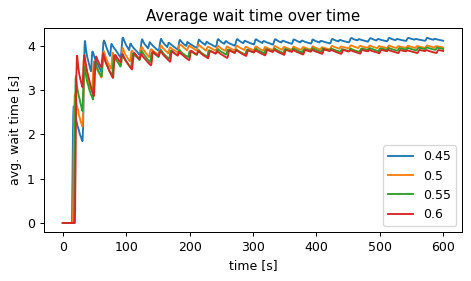

In [12]:
fig,ax = multi_eval.plot_avg_wait_times(plt=plt, fig_size=(6,3))
plt.savefig('figs/periodic_wait_time', bbox_inches='tight')

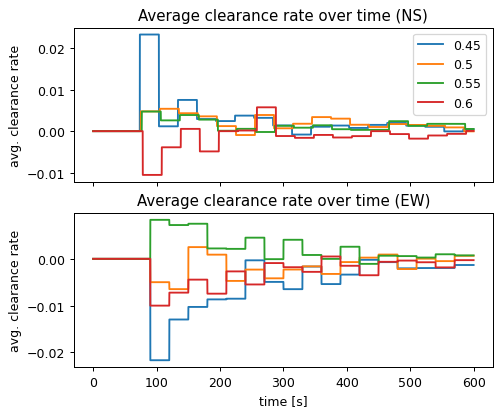

In [13]:
fig,ax = multi_eval.plot_avg_clearance_rates(plt=plt, grid_ind=(0,0), fig_size=(6,5))
plt.savefig('figs/periodic_clearance_rate', bbox_inches='tight')

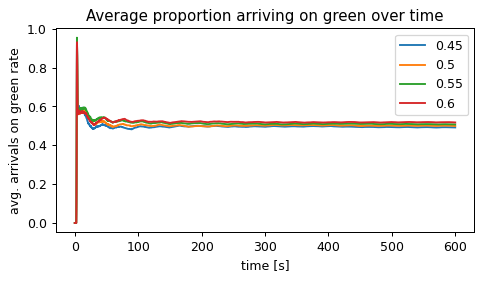

In [14]:
fig,ax = multi_eval.plot_avg_arrivals_on_green_rate(plt=plt, grid_ind=(0,0), fig_size=(6,3))
plt.savefig('figs/periodic_arrival_on_green', bbox_inches='tight')

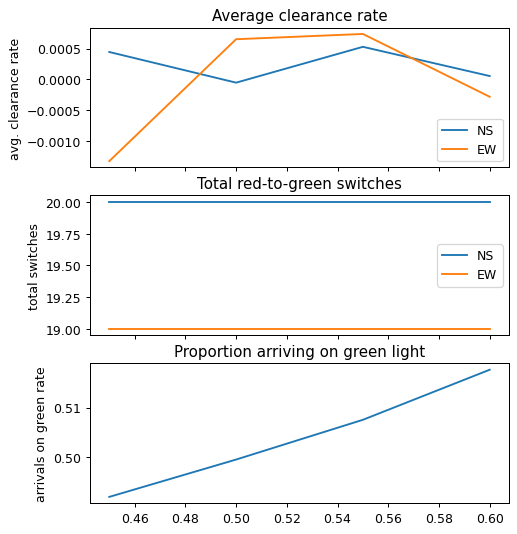

In [15]:
fig,axs = multi_eval.plot_intersection_averages(plt=plt, grid_ind=(0,0), fig_size=(6,7))
plt.savefig('figs/periodic_intersection_avgs', bbox_inches='tight')

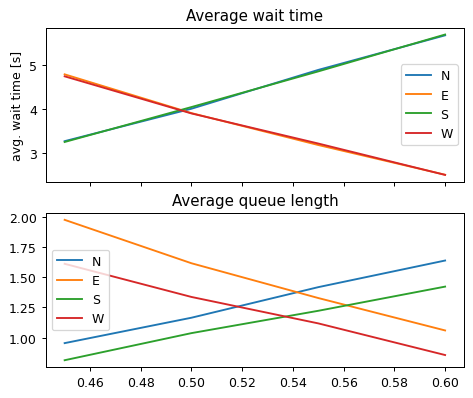

In [16]:
fig,axs = multi_eval.plot_queue_averages(plt=plt, grid_ind=(0,0), fig_size=(6,5))
plt.savefig('figs/periodic_queue_avgs', bbox_inches='tight')

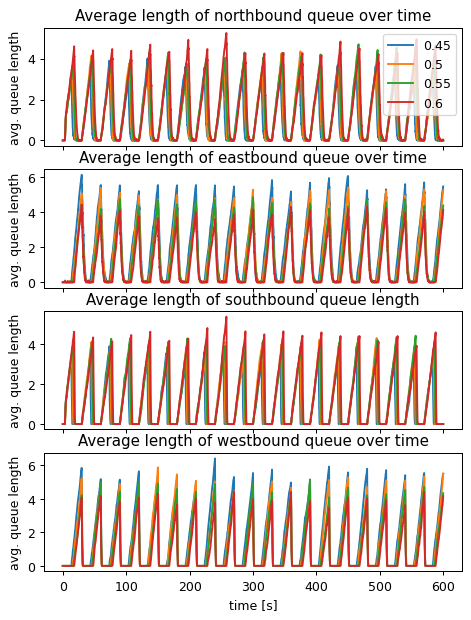

In [11]:
fig,axs = multi_eval.plot_queue_lengths(plt=plt, grid_ind=(0,0), fig_size=(6,8))
#plt.savefig('figs/periodic_vs_adaptive_queue_length', bbox_inches='tight')

In [ ]:
average[(0,0)]["N"]["avg_wait_time"]